# 1. NumPy 기본 테크닉

### NumPy 버전 확인

In [5]:
import numpy as np
np.__version__

'1.18.4'

### 배열을 arange()로 생성

In [2]:
x = np.arange(10)
print(x)
type(x)

[0 1 2 3 4 5 6 7 8 9]


numpy.ndarray

### 파이썬 리스트 기반

In [3]:
y = np.arange(1000000)
y = y ** 2

In [4]:
z = list(range(1000000))
z = z ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [5]:
animal = ['Dog', 'Mammal', 45, 7]
print(animal)

['Dog', 'Mammal', 45, 7]


In [6]:
np.array(animal)

array(['Dog', 'Mammal', '45', '7'], dtype='<U6')

### 배열의 차원 변경

In [7]:
ndim = np.arange(27).reshape(3,3,3)
print(ndim)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [8]:
twos = np.arange(16).reshape(2,2,2,2)
print(twos)

[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]


### 차원 인덱스 및 변경

In [17]:
data = np.random.randint(10, size=15)
print(data)

[6 2 9 8 1 3 6 2 5 5 1 6 0 4 4]


In [20]:
data[4:8]

array([1, 3, 6, 2])

In [21]:
data = data.reshape(3,5)
data

array([[6, 2, 9, 8, 1],
       [3, 6, 2, 5, 5],
       [1, 6, 0, 4, 4]])

In [24]:
data[0,0]

6

# 2. Arg를 이용한 Sorting

In [12]:
x = np.array([3,5,1,6,2,7])
print(np.argsort(x))
print(x[x.argsort()])
print(x)

[2 4 0 1 3 5]
[1 2 3 5 6 7]
[3 5 1 6 2 7]


In [13]:
grade = np.array([3, 5, 1, 6, 2, 7])
ages = np.array([8, 10, 6, 11, 7, 12])

sort_index = np.argsort(ages)

In [14]:
print(grade[sort_index])
print(ages[sort_index])

[1 2 3 5 6 7]
[ 6  7  8 10 11 12]


In [15]:
print(list(grade[sort_index]))

[1, 2, 3, 5, 6, 7]


In [16]:
print(list(ages[sort_index])[::-1])

[12, 11, 10, 8, 7, 6]


# 3. Random 난수 생성

In [2]:
import numpy.random as npr
import matplotlib.pyplot as plt

In [21]:
x = npr.standard_normal(10000)
print({"{:15.10f}".format(x.mean())})
print({"{:15.10f}".format(x.std())})

{'   0.0100012204'}
{'   0.9960799959'}


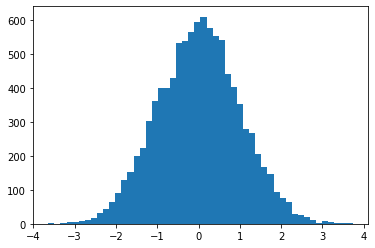

In [23]:
plt.hist(x,bins=50)
plt.show()

In [24]:
y = np.concatenate([x, -x])
print("{:15.10f}".format(y.mean()))
print("{:15.10f}".format(y.std()))

  -0.0000000000
   0.9961302036


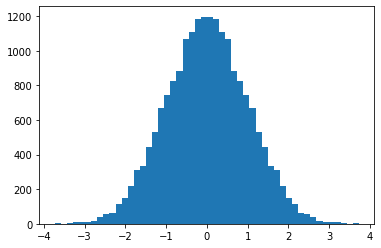

In [25]:
plt.hist(y,bins=50)
plt.show()

## 분산이 1인 값으로 정규화(Normalization) 하기

In [26]:
z = (y-y.mean()) / y.std()

In [27]:
print("{:15.10f}".format(y.std()))
print("{:15.10f}".format(z.std()))
print("{:15.10f}".format(z.mean()))

   0.9961302036
   1.0000000000
   0.0000000000


## Seed()로 난수생성 고정

In [28]:
c = npr.random(10)
c

array([0.87754172, 0.92964232, 0.88070396, 0.092461  , 0.22387657,
       0.09444315, 0.22501612, 0.37560032, 0.090563  , 0.95233663])

In [29]:
npr.seed(42)
d = npr.random(10)
d

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

# 4. Clipping & Sampling

In [3]:
x = npr.randint(-10,10, size=100)
print(x)

[ -6  -2   9 -10  -5  -8   3  -9  -1  -7   9  -2   6   4   2  -9  -8   0
   0  -4  -1   2   2   1  -1  -3  -1   2  -5   6 -10   0  -3  -8  -2  -9
   0 -10   1   1  -9 -10  -9  -7   6   0   0   7   5 -10   0  -3   7  -1
 -10   2   9  -7 -10   5   6   9   9   0  -8   3   5   1   7  -1   7   7
   4   5  -3   8  -1  -4  -7  -5   0  -5   0   2  -8  -6  -3  -2  -6   1
   0  -9   0   2   6 -10  -3  -9  -7   1]


## 범위 지정 값만 탐색하기

In [8]:
# -4부터 0까지
np.clip(x, -4, 0)

array([-4, -2,  0, -4, -4, -4,  0, -4, -1, -4,  0, -2,  0,  0,  0, -4, -4,
        0,  0, -4, -1,  0,  0,  0, -1, -3, -1,  0, -4,  0, -4,  0, -3, -4,
       -2, -4,  0, -4,  0,  0, -4, -4, -4, -4,  0,  0,  0,  0,  0, -4,  0,
       -3,  0, -1, -4,  0,  0, -4, -4,  0,  0,  0,  0,  0, -4,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -3,  0, -1, -4, -4, -4,  0, -4,  0,  0, -4,
       -4, -3, -2, -4,  0,  0, -4,  0,  0,  0, -4, -3, -4, -4,  0])

In [12]:
# 0 이상만 Threshshold = 0
x.clip(0)

array([0, 0, 9, 0, 0, 0, 3, 0, 0, 0, 9, 0, 6, 4, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 0, 0, 0, 2, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       6, 0, 0, 7, 5, 0, 0, 0, 7, 0, 0, 2, 9, 0, 0, 5, 6, 9, 9, 0, 0, 3,
       5, 1, 7, 0, 7, 7, 4, 5, 0, 8, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 6, 0, 0, 0, 0, 1])

## 랜덤 샘플링

In [13]:
y = npr.randint(1000, size=100)
print(y)

[191 900 107 324  26 916 321 199 222 817 396 287 704 622 535 120 694 753
 132 395 493 974 500 308 659 176 886 388 644 649 711  74 262 830 895 496
 502 350 863 701  16 300  54 884 893 628 555 891 678 723 167 837 136   9
 618 768 614 448 430 391 788 629 525 702 600 514 675 223 950 693 586 668
 359 662 648 234 949 169 960 327 366 804 366 359  58 201 110 251 173 522
 428 464 177 597 762 161 364 700 207 920]


In [15]:
npr.choice(y, 20, replace=False)

array([  9, 388, 895,  26, 395, 649, 920, 173, 837, 493, 702, 701, 804,
       366, 500, 678, 428, 704, 169, 950])

## 안정적 샘플 (Stable sample) 

In [17]:
z = npr.random(100)
sample = np.argsort(z)

In [18]:
sample

array([71, 80, 52, 92, 55, 70, 89, 50, 44, 40, 11, 82, 27, 54, 75, 93, 61,
       19,  3, 32, 21, 18, 98, 46,  5, 84, 37,  0, 63, 17,  1, 58, 41, 33,
       72, 45, 51, 36, 66,  7, 24, 88, 67, 38, 35, 85, 26, 25, 68, 99, 30,
       12, 81, 60, 13, 31, 10, 83, 73, 47, 69,  8, 20, 86, 49, 42, 77, 74,
       95, 65,  2, 90, 28, 94, 59, 16, 14, 76, 34, 91, 48, 78, 87, 15, 23,
       39, 97, 62, 56, 57, 29, 43, 64,  9, 22, 53, 96,  6, 79,  4])

In [19]:
z[sample][:20]

array([0.00309088, 0.00530174, 0.0078276 , 0.00837669, 0.02817714,
       0.03981818, 0.07497544, 0.07797718, 0.08096873, 0.08929127,
       0.09418046, 0.11067367, 0.11374052, 0.12189837, 0.13069079,
       0.13279935, 0.13390927, 0.16478538, 0.17711179, 0.17872999])

In [20]:
y[sample][:20]

array([668, 366, 136, 177, 768, 586, 522, 167, 893,  16, 287, 366, 388,
       618, 234, 597, 629, 395, 324, 262])

# 5. Unique 값과 핵심 포인트 찾기

In [21]:
from itertools import combinations

In [22]:
available = [x[0] + x[1] + x[2] for x in combinations("ABCDEFGHJKLM", 3)]
symbols = npr.choice(available, 60)
symbols

array(['HKM', 'BHL', 'CEG', 'DHM', 'BDF', 'AEJ', 'CDF', 'BKM', 'JKM',
       'BCF', 'BHM', 'AJK', 'AEF', 'GKM', 'DFK', 'EHK', 'BHK', 'CKL',
       'CEG', 'AKL', 'BDJ', 'DGM', 'FHK', 'AGL', 'EHM', 'AFG', 'CDE',
       'HKM', 'BFL', 'ABJ', 'DHJ', 'DGK', 'BGM', 'CFG', 'CDG', 'FJK',
       'CDG', 'DEM', 'FJK', 'ADE', 'CJL', 'EFL', 'DHL', 'CFM', 'AGH',
       'ABJ', 'BCL', 'BFM', 'CEH', 'BHK', 'CDL', 'BCD', 'EJL', 'CFM',
       'BDM', 'AKL', 'BDH', 'EFM', 'DEM', 'AHL'], dtype='<U3')

## Sort Unique 값으로 Sort 하기

In [23]:
np.unique(symbols)

array(['ABJ', 'ADE', 'AEF', 'AEJ', 'AFG', 'AGH', 'AGL', 'AHL', 'AJK',
       'AKL', 'BCD', 'BCF', 'BCL', 'BDF', 'BDH', 'BDJ', 'BDM', 'BFL',
       'BFM', 'BGM', 'BHK', 'BHL', 'BHM', 'BKM', 'CDE', 'CDF', 'CDG',
       'CDL', 'CEG', 'CEH', 'CFG', 'CFM', 'CJL', 'CKL', 'DEM', 'DFK',
       'DGK', 'DGM', 'DHJ', 'DHL', 'DHM', 'EFL', 'EFM', 'EHK', 'EHM',
       'EJL', 'FHK', 'FJK', 'GKM', 'HKM', 'JKM'], dtype='<U3')

In [24]:
len(np.unique(symbols))

51